> # INSTALATION AND IMPORTS

In [ ]:
!pip3 install pandas
!pip3 install glob
!pip3 install re
!pip3 install tweet-preprocessor
!pip3 install nltk
!pip3 install textblob
# !pip3 install ssl
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install WordCloud
!pip3 install gensim
!pip3 install vaderSentiment

In [1]:
import pandas as pd
import glob
import re
from textblob import TextBlob
import preprocessor as p
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import nltk
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor



from nltk.corpus import stopwords
#nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
stemmer = PorterStemmer()


import re
from collections import Counter
from string import punctuation
# import tweepy
#from tweepy import OAuthHandler
import json
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Installing nltk on MacOS
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

# DEFINING VARIABLES

training_dataset = pd.DataFrame()
twitter_tweets = pd.DataFrame()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
unable to import 'smart_open.gcs', disabling that module


> # DATA CLEANSING


Defining data cleansing method


In [3]:
#Columns Of the final CSV 
COLS = ['id', 'created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity','label', 'lang',
        'f,./avorite_count', 'retweet_count', 'original_author', 'possibly_sensitive', 'hashtags',
        'user_mentions', 'place', 'place_coord_boundaries']

In [4]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

In [5]:
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [6]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [7]:
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [10]:
def data_cleansing (data) :   
    twitter_tweets_cleaned_temp = pd.DataFrame()
    for index, status in data.iterrows():
        new_entry = []

        #tweepy preprocessing called for basic preprocessing
        clean_text = p.clean(status['full_text'])

        #call clean_tweet method for extra preprocessing
        filtered_tweet=clean_tweets(clean_text)

        #filtered_tweet=clean_tweets(status['full_text'])
        #pass textBlob method for sentiment calculations
        blob = TextBlob(filtered_tweet)
        Sentiment = blob.sentiment

        #seperate polarity and subjectivity in to two variables
        polarity = Sentiment.polarity
        subjectivity = Sentiment.subjectivity

        compound_score = sia.polarity_scores(filtered_tweet)['compound']

        label = 0 # neutral tweet

        if compound_score > 0:
            label = 1 # positive tweet
        elif compound_score < 0:
            label = -1 # negative tweet

        #new entry append
        new_entry += [status['id'], status['created_at'],
                      status['source'], status['full_text'],filtered_tweet, Sentiment,polarity,subjectivity,label, status['lang'],
                      status['favorite_count'], status['retweet_count']]

        #to append original author of the tweet
        new_entry.append(status['user']['screen_name'])

        try:
            is_sensitive = status['possibly_sensitive']
        except KeyError:
            is_sensitive = None
        new_entry.append(is_sensitive)

        # hashtagas and mentiones are saved using comma separted
        hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
        new_entry.append(hashtags)
        mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
        new_entry.append(mentions)

        #get location of the tweet if possible
        try:
            location = status['user']['location']
        except TypeError:
            location = ''
        new_entry.append(location)

        try:
            coordinates = [coord for loc in status['place']['bounding_box']['coordinates'] for coord in loc]
        except TypeError:
            coordinates = None
        new_entry.append(coordinates)
        single_tweet_df = pd.DataFrame([new_entry], columns=COLS)
        twitter_tweets_cleaned_temp = twitter_tweets_cleaned_temp.append(single_tweet_df, ignore_index=True)
    return twitter_tweets_cleaned_temp

> # TEST DATA

In [11]:
january_2020_files = glob.glob('data/january_2020/*2020-01-2*.jsonl.gz')

In [12]:
# Reading multiple files and combining the data into single dataframe
for files in january_2020_files:
    print('Reading ' + files)
    data = pd.read_json(files, lines=True)
    twitter_tweets = twitter_tweets.append(data, ignore_index=True)

Reading data/january_2020/coronavirus-tweet-id-2020-01-22-16.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-17.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-01.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-00.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-06.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-07.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-11.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-10.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-02.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-03.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-15.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-14.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-12.jsonl.gz
Reading data/january_2020/coronavirus-tweet-id-2020-01-22-13.jsonl.gz
Reading data/january

In [13]:
twitter_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2020-01-22 16:52:54+00:00,1220026565276459010,1220026565276459008,RT @GoMcGillMedia: CDC Confirms The First Case...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1219974586269421569, 'id_str...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1,0,False,False,0.0,en,NaN,NaN,NaN,NaN
1,2020-01-22 16:52:55+00:00,1220026569814614018,1220026569814614016,RT @EpochTimesChina: #WuhanCoronavirus: The @C...,False,"[0, 140]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,36,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2,2020-01-22 16:53:05+00:00,1220026608100220931,1220026608100220928,"There's a ""new"" virus spreading in China and A...",False,"[0, 252]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...",NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,...,3,5,False,False,0.0,en,NaN,NaN,NaN,NaN
3,2020-01-22 16:53:05+00:00,1220026610985787392,1220026610985787392,RT @LynnSmithTV: Deadly virus from China: CDC ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,2,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,2020-01-22 16:53:07+00:00,1220026618120429568,1220026618120429568,RT @CDCEnvironment: Prevent #COpoisoning. Neve...,False,"[0, 140]","{'hashtags': [{'text': 'COpoisoning', 'indices...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,7,0,False,False,NaN,en,NaN,NaN,NaN,NaN


In [16]:
# Export Data to CSV
twitter_tweets.to_csv('data/export/january_2020.csv', encoding='utf-8')

In [15]:
twitter_tweets_cleaned = data_cleansing(twitter_tweets)
twitter_tweets_cleaned.head(10)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,label,lang,"f,./avorite_count",retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1220026565276459010,2020-01-22 16:52:54+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @GoMcGillMedia: CDC Confirms The First Case...,CDC Confirms The First Case Of Coronavirus In ...,"(0.25, 0.3333333333333333)",0.250000,0.333333,1,en,0,1,justmorganite,0.0,,GoMcGillMedia,"BRONX, NY",None
1,1220026569814614018,2020-01-22 16:52:55+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @EpochTimesChina: #WuhanCoronavirus: The @C...,The announced started “ entry screening passen...,"(0.1, 0.4)",0.100000,0.400000,0,en,0,36,EpochTimes,NaN,WuhanCoronavirus,"EpochTimesChina, CDCgov","New York, USA",None
2,1220026608100220931,2020-01-22 16:53:05+00:00,"<a href=""https://sproutsocial.com"" rel=""nofoll...","There's a ""new"" virus spreading in China and A...",There 's `` new '' virus spreading China Asia ...,"(0.521590909090909, 0.421969696969697)",0.521591,0.421970,1,en,5,3,AlliedPhysGroup,0.0,WuhanCoronavirus,,"New York, USA",None
3,1220026610985787392,2020-01-22 16:53:05+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @LynnSmithTV: Deadly virus from China: CDC ...,Deadly virus China CDC doc says right American...,"(0.1119047619047619, 0.3952380952380952)",0.111905,0.395238,-1,en,0,2,Sheridon45,NaN,,LynnSmithTV,"Las Vegas, NV",None
4,1220026618120429568,2020-01-22 16:53:07+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CDCEnvironment: Prevent #COpoisoning. Neve...,Prevent Never run gas-powered generators home ...,"(-0.15, 0.225)",-0.150000,0.225000,1,en,0,7,MononaCoEnviron,NaN,COpoisoning,CDCEnvironment,"Onawa, Iowa",None
5,1220026715646259200,2020-01-22 16:53:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @cmyeaton: The journal China CDC Weekly has...,The journal China CDC Weekly published outbrea...,"(0.1, 0.3)",0.100000,0.300000,0,en,0,56,hayesluk,0.0,,cmyeaton,Hong Kong,None
6,1220026723510751232,2020-01-22 16:53:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@speakingabtpain We can also thank Medboards C...,We also thank Medboards CDC DEAth squads They ...,"(-0.30000000000000004, 0.2)",-0.300000,0.200000,-1,en,12,3,MichaelNey19,0.0,,speakingabtpain,"Wisconsin, USA","[[-88.070827, 42.920822], [-87.863758, 42.9208..."
7,1220026747195924480,2020-01-22 16:53:38+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @libertynation: JUST IN: Chinese health off...,JUST IN Chinese health officials confirm least...,"(-0.16666666666666666, 0.26666666666666666)",-0.166667,0.266667,-1,en,0,3,BNichollso,NaN,WuhanCoronavirus,libertynation,"Minneapolis, MN",None
8,1220026793085657088,2020-01-22 16:53:49+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @cmyeaton: The journal China CDC Weekly has...,The journal China CDC Weekly published outbrea...,"(0.1, 0.3)",0.100000,0.300000,0,en,0,56,jLewnard,0.0,,cmyeaton,"Berkeley, CA",None
9,1220026795476553729,2020-01-22 16:53:49+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @EpochTimesChina: #WuhanCoronavirus: The @C...,The announced started “ entry screening passen...,"(0.1, 0.4)",0.100000,0.400000,0,en,0,36,JGurath,NaN,WuhanCoronavirus,"EpochTimesChina, CDCgov",,None


In [19]:
#Cleansed Dataframe to CSV
twitter_tweets_cleaned.to_csv('data/export/january_2020_cleaned.csv', encoding='utf-8')

> # FEATURE EXTRACTION


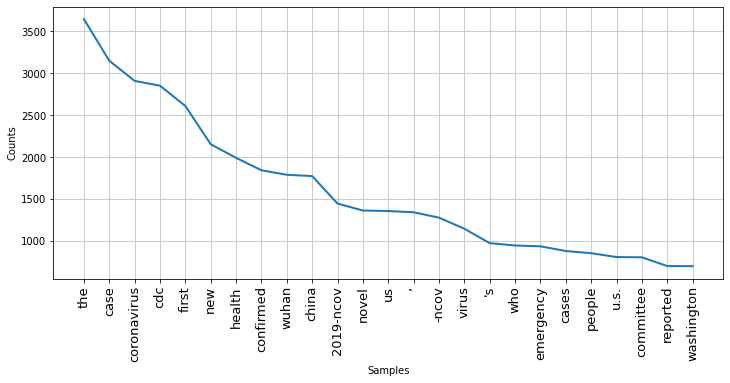

Text(0.5, 0, 'Word Rank')

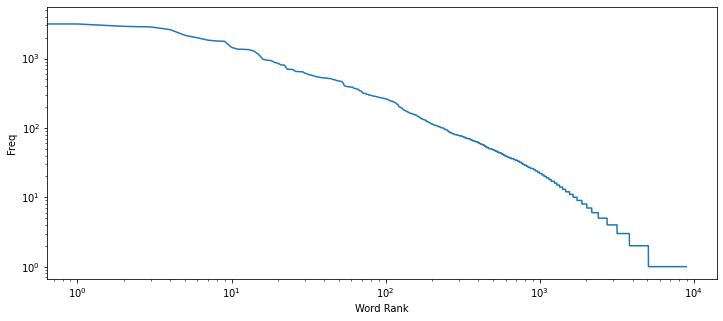

In [20]:
# most common words in twitter dataset
all_words = []
for line in list(twitter_tweets_cleaned['clean_text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)

plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [21]:
twitter_tweets_cleaned_duplicate = twitter_tweets_cleaned.copy();
twitter_tweets_cleaned_duplicate = twitter_tweets_cleaned_duplicate.drop_duplicates('clean_text')
twitter_tweets_cleaned_duplicate.shape

(3938, 18)

In [86]:
# show stop words
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)
print(type(stop_words))
#print(stop_words)
#remove common first person sinfular pronouns from stop word list (they are important for detecting mental disorders)
firstPronouns = ['the','a','an','in']
for pro in firstPronouns:
    stop_words.remove(pro)
print(stop_words)

<class 'list'>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 've

In [23]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords except for those in first person
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]


#def remove_words(word_list):
    #remove = ['depressed','anxiety','excited','hopeless','numb','...','“','”','’','…']
    #return [w for w in word_list if w not in remove]

# -------------------------------------------

# tokenize message column and create a column for tokens
twitter_tweets_cleaned_duplicate['tokens'] = twitter_tweets_cleaned_duplicate['clean_text'].apply(text_process) # tokenize style 1
#df_test['no_pauls'] = df_test['tokens'].apply(remove_words) #tokenize style 2
twitter_tweets_cleaned_duplicate.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,label,lang,"f,./avorite_count",retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,tokens
0,1220026565276459010,2020-01-22 16:52:54+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @GoMcGillMedia: CDC Confirms The First Case...,CDC Confirms The First Case Of Coronavirus In ...,"(0.25, 0.3333333333333333)",0.250000,0.333333,1,en,0,1,justmorganite,0.0,,GoMcGillMedia,"BRONX, NY",None,"[cdc, confirms, first, case, coronavirus, us, ..."
1,1220026569814614018,2020-01-22 16:52:55+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @EpochTimesChina: #WuhanCoronavirus: The @C...,The announced started “ entry screening passen...,"(0.1, 0.4)",0.100000,0.400000,0,en,0,36,EpochTimes,NaN,WuhanCoronavirus,"EpochTimesChina, CDCgov","New York, USA",None,"[announced, started, “, entry, screening, pass..."
2,1220026608100220931,2020-01-22 16:53:05+00:00,"<a href=""https://sproutsocial.com"" rel=""nofoll...","There's a ""new"" virus spreading in China and A...",There 's `` new '' virus spreading China Asia ...,"(0.521590909090909, 0.421969696969697)",0.521591,0.421970,1,en,5,3,AlliedPhysGroup,0.0,WuhanCoronavirus,,"New York, USA",None,"[new, virus, spreading, china, asia, called, w..."
3,1220026610985787392,2020-01-22 16:53:05+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @LynnSmithTV: Deadly virus from China: CDC ...,Deadly virus China CDC doc says right American...,"(0.1119047619047619, 0.3952380952380952)",0.111905,0.395238,-1,en,0,2,Sheridon45,NaN,,LynnSmithTV,"Las Vegas, NV",None,"[deadly, virus, china, cdc, doc, says, right, ..."
4,1220026618120429568,2020-01-22 16:53:07+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CDCEnvironment: Prevent #COpoisoning. Neve...,Prevent Never run gas-powered generators home ...,"(-0.15, 0.225)",-0.150000,0.225000,1,en,0,7,MononaCoEnviron,NaN,COpoisoning,CDCEnvironment,"Onawa, Iowa",None,"[prevent, never, run, gaspowered, generators, ..."


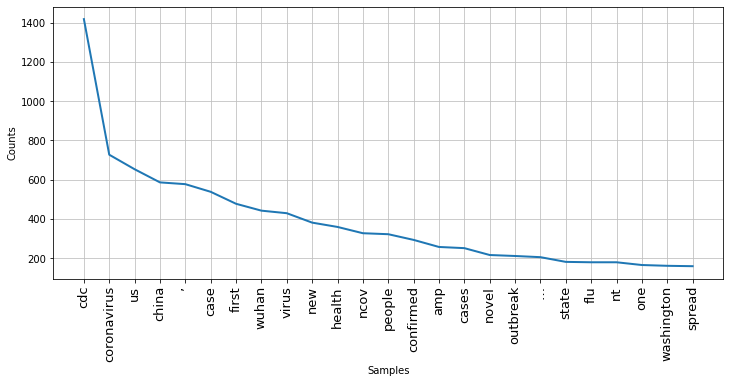

Text(0.5, 0, 'Word Rank')

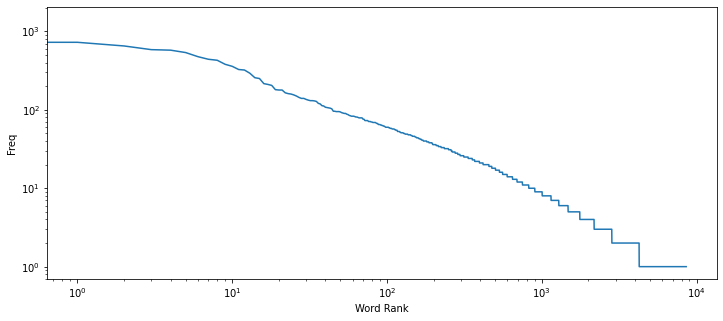

In [24]:
# most common words in twitter dataset after tokenizing
all_words = []
for ls in twitter_tweets_cleaned_duplicate['tokens']:
    words = [w for w in ls]
    for word in words:
        all_words.append(word.lower())
    
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log  of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

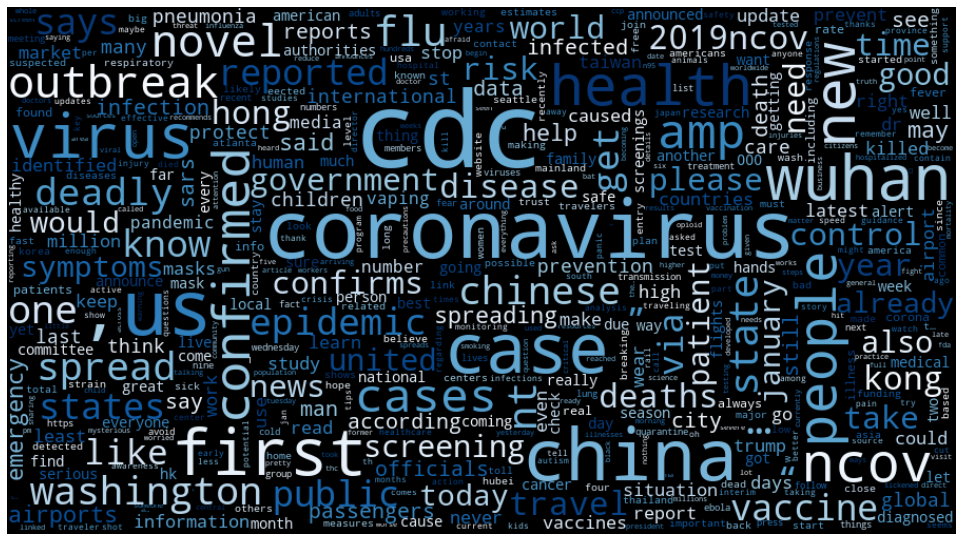

In [25]:
# visualize cleaned tweets/story-telling of data
# graphs, wordclouds
# split sentences to get individual words
all_words = []
for line in twitter_tweets_cleaned_duplicate['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# `VECTORIZE`


In [26]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

In [88]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(twitter_tweets_cleaned_duplicate['clean_text'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# example of vectorized text
sample_tweet = twitter_tweets_cleaned_duplicate['clean_text'][10]
print(sample_tweet)
print('\n')# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
#print('\n')

8577
Ask CDC clearly ’ know flu shot tested pregnant wome…


  (0, 641)	1
  (0, 1237)	1
  (0, 1440)	1
  (0, 3024)	1
  (0, 4223)	1
  (0, 5749)	1
  (0, 6763)	1
  (0, 7441)	1
  (0, 8299)	1
  (0, 8475)	1


In [28]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(twitter_tweets_cleaned_duplicate['clean_text'])# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (3938, 8577)
Amount of Non-Zero occurences:  48019


In [29]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 8475)	0.1733949323675072
  (0, 8299)	0.4690423295163215
  (0, 7441)	0.34058271337749285
  (0, 6763)	0.33105749228958314
  (0, 5749)	0.3627339595414488
  (0, 4223)	0.2377259138933998
  (0, 3024)	0.24056984118832478
  (0, 1440)	0.3868720317536213
  (0, 1237)	0.11272934428679823
  (0, 641)	0.34058271337749285


In [30]:
# some IDF (inverse document frequency) example
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["virus"]])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["coronavirus"]])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["deadly"]])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["epidemic"]])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["confirmed"]])

3.2723290033691734
2.70920074255661
4.2680468688746505
4.337039740361602
3.6438925598016563


In [31]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3938, 8577)


> # MODELING

In [55]:
# Run Train Data Through Pipeline analyzer=text_process
X_train, X_test, y_train, y_test = train_test_split(twitter_tweets_cleaned['clean_text'], twitter_tweets_cleaned['label'], test_size=0.2)

> ## `Naive Bayes`

In [56]:
# create pipeline (using model Naive Bayes)
nb_pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(nb_pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   25.2s finished



Best Model: 0.905960 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.899293 Stdev:(0.007773) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.902020 Stdev:(0.008056) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.897576 Stdev:(0.007788) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.901010 Stdev:(0.006761) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.903030 Stdev:(0.008487) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.905960 Stdev:(0.008799) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.901616 Stdev:(0.009271) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.903838 Stdev:(0.007434) with: {'bow__ngram_range'

In [57]:
# save best model to current working directory
joblib.dump(grid, "data/model/twitter_sentiment_nb.pkl")

['data/model/twitter_sentiment_nb.pkl']

In [58]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("data/model/twitter_sentiment_nb.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.9163974151857835


confusion matrix: 
 [[730  19  42]
 [ 41 818  46]
 [ 41  18 721]]


              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       791
           0       0.96      0.90      0.93       905
           1       0.89      0.92      0.91       780

    accuracy                           0.92      2476
   macro avg       0.92      0.92      0.92      2476
weighted avg       0.92      0.92      0.92      2476



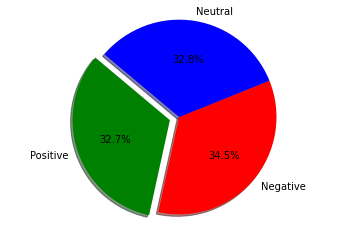

In [85]:
import collections, numpy
import matplotlib.pyplot as plt
predictionCounter = collections.Counter(y_preds)
predictionCounter[-1]
labels = ['Positive', 'Negative', 'Neutral']
sizes = [predictionCounter[1],predictionCounter[0],predictionCounter[-1]]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

> ## `LogisticRegression`

In [48]:
lr_pipeline = Pipeline([
    ('bow', bow_transformer),  # strings to token integer counts
    ('tfidf', tfidf_transformer),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(max_iter=10000)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

lr_pipeline.fit(X_train, y_train)
predictions = lr_pipeline.predict(X_test)


print('accuracy score: ',accuracy_score(predictions, y_test))
print('\n')
print('confusion matrix: \n',confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))
print('\n')

accuracy score:  0.9192245557350566


confusion matrix: 
 [[706  31  33]
 [ 39 827  40]
 [ 36  21 743]]


              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       770
           0       0.94      0.91      0.93       906
           1       0.91      0.93      0.92       800

    accuracy                           0.92      2476
   macro avg       0.92      0.92      0.92      2476
weighted avg       0.92      0.92      0.92      2476





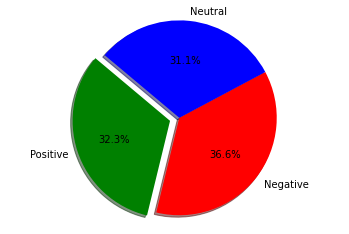

In [84]:
import collections, numpy
import matplotlib.pyplot as plt
predictionCounter = collections.Counter(predictions)
predictionCounter[-1]
labels = ['Positive', 'Negative', 'Neutral']
sizes = [predictionCounter[1],predictionCounter[0],predictionCounter[-1]]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## CONCLUSION
- A very high accuracy score, and convincing to say both the algorithm could detect significant negative ratio though the tweets.

## FUTURE SCOPE
- Emojis could also be used to extract more context to the text.